In [1]:
import pandas as pd
import numpy as np
import operator
import time
import random

In [2]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

In [6]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [7]:
df = pd.read_excel(r'ENB2012_data.xlsx')

In [8]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


In [9]:
df.drop(['Unnamed: 10','Unnamed: 11'], axis = 1, inplace = True)

In [10]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [12]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [13]:
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [14]:
cols = ['X1','X2','X3','X4','X5','X6','X7','X8']

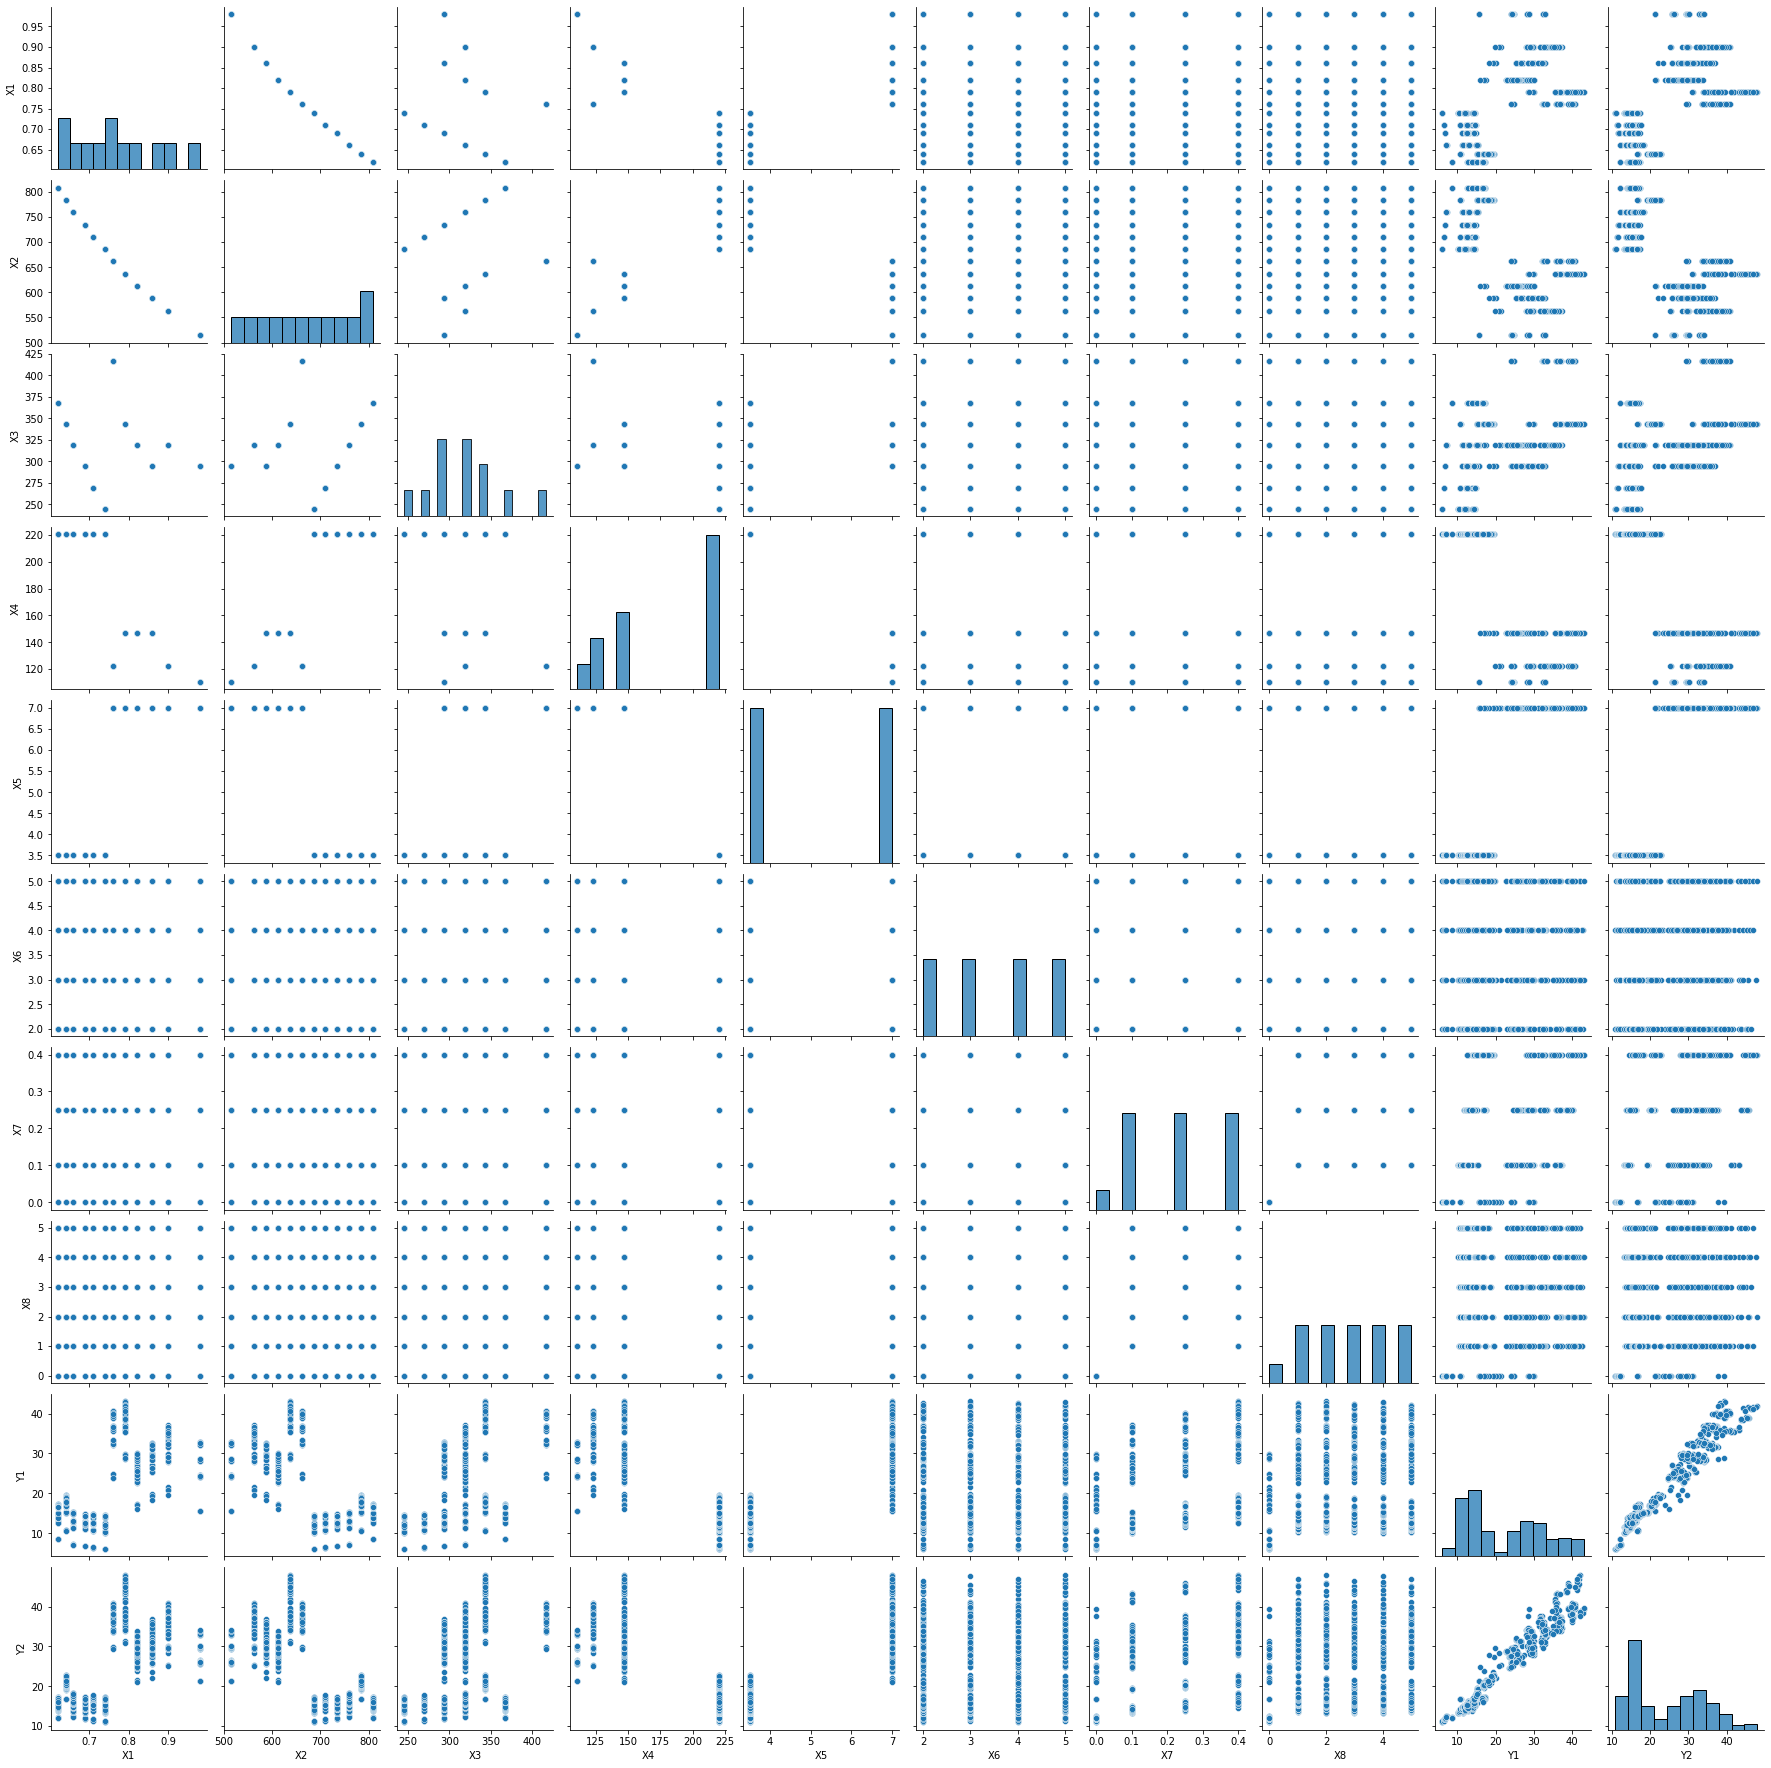

In [15]:
sns.pairplot(df, vars=df.columns)

In [16]:
def scat_target(df, xs, ys):
    fig, axes = plt.subplots(nrows = len(ys), ncols = len(xs), figsize = (20,5))
    for i, y in enumerate(ys):
        for j, x in enumerate(xs):
            axes[i][j].scatter(df[x], df[y])
            axes[i][j].set_xlabel(x)
            axes[i][j].set_ylabel(y)
    plt.tight_layout()
    plt.show()

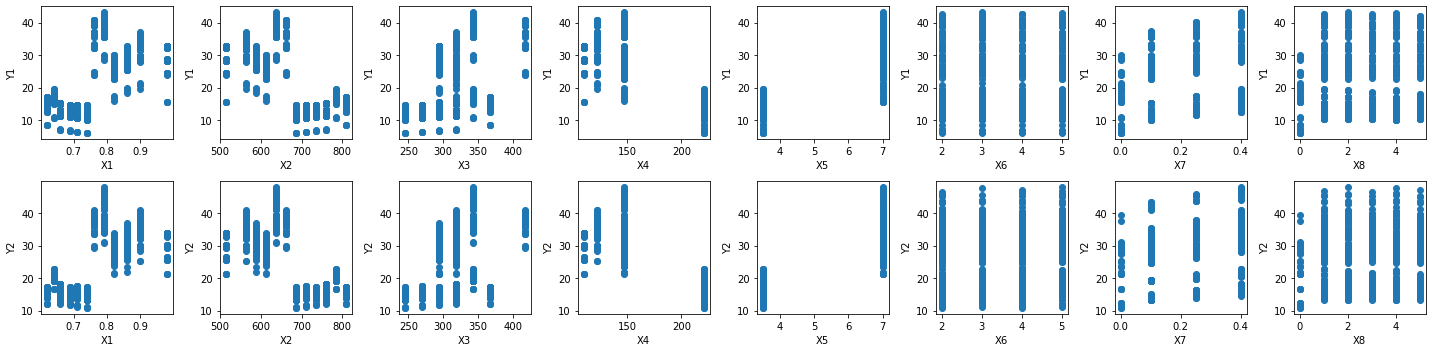

In [17]:
scat_target(df, cols, ['Y1','Y2'])

In [18]:
def boxplots(df, targets):
    fig, axes = plt.subplots(ncols = 1, nrows = len(targets), figsize = (7,40))
    for i, target in enumerate(targets):
        sns.boxplot(x = df[target], 
                    ax = axes[i], 
                    showmeans = True,
                   meanprops = {"markersize":"13",
                               "markerfacecolor":"orange",
                               "markeredgecolor":"red"})
        axes[i].set_xlabel(target)
    plt.tight_layout()
    plt.show()

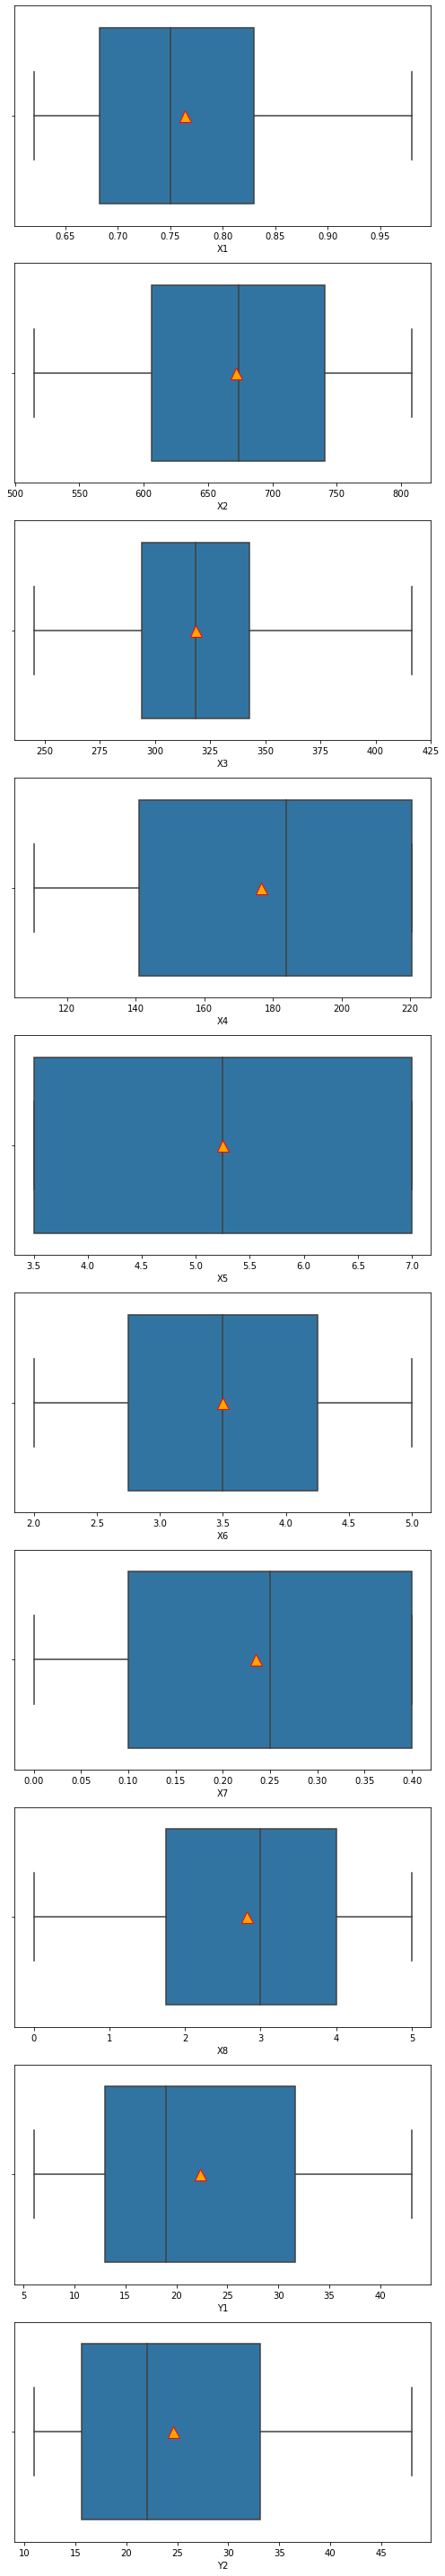

In [19]:
boxplots(df, df.columns)

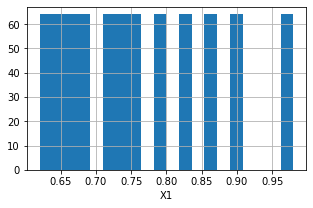

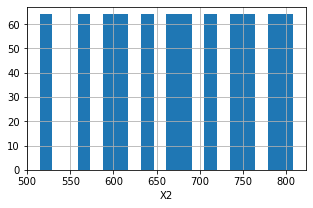

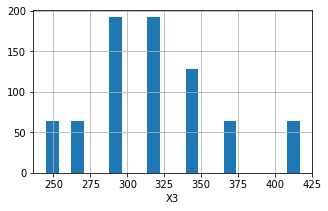

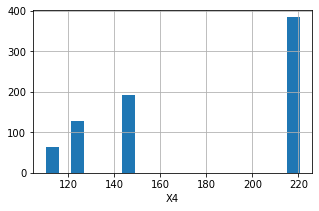

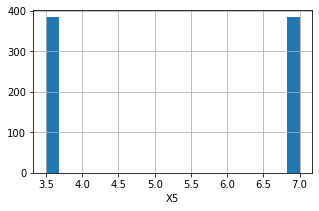

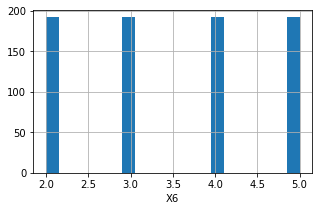

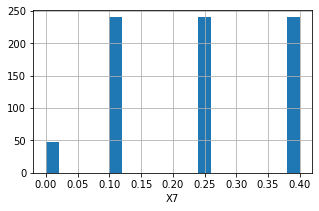

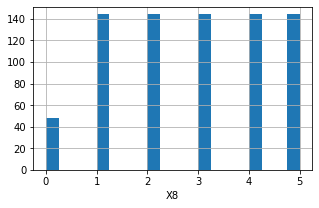

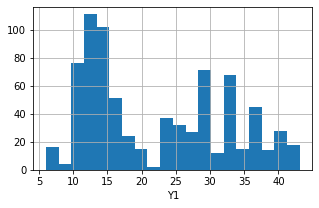

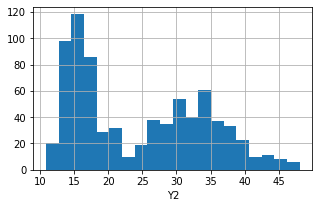

In [20]:
for col in df.columns:
    plt.figure(figsize = (5,3))
    df[col].hist(bins = 20)
    plt.xlabel(col)

In [21]:
df_ml = df.copy()
ss = StandardScaler()
df_ml[cols]= ss.fit_transform(df[cols])

In [22]:
x = df_ml.iloc[:,:-2]
y1 = df_ml.iloc[:,-2]
y2 = df_ml.iloc[:,-1]

In [23]:
def selecting_model(x, y, k, model):
    fs = SelectKBest(score_func = f_regression, k = k)
    fs.fit(x, y)
    x = fs.transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)
    ml = model.fit(x_train, y_train)
    y_pred = ml.predict(x_test)
    mae = mean_absolute_error(y_pred, y_test)
    return mae

In [24]:
def modelling(x, y, k, model):
    fs = SelectKBest(score_func = f_regression, k = k)
    fs.fit(x, y)
    x = fs.transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)
    ml = model.fit(x_train, y_train)
    y_pred = ml.predict(x_test)
    mae = mean_absolute_error(y_pred, y_test)
    mse = mean_squared_error(y_pred, y_test)
    rmse = np.sqrt(mse)
    scores = [mae, mse, rmse]
    indexes = ['MAE','MSE','RMSE']
    cols = ['scores']
    dt = pd.DataFrame(scores, columns = cols, index = indexes)
    print(dt)
    shape = x_test.shape[1]
    if shape > 1:
        fig, axes = plt.subplots(nrows=2, ncols=shape, figsize=(10, 5))
        for i in range(shape):
            x1_test = np.arange(min(x_test[:, i]), max(x_test[:, i]), 0.001)
            ml.fit(x_train[:, i].reshape(-1, 1), y_train)
            y1_pred = ml.predict(x1_test.reshape(-1, 1))
            axes[0][i].plot(x1_test, y1_pred, color='red')
            axes[0][i].scatter(x_test[:, i], y_pred)
            axes[1][i].scatter(x_test[:, i], y_test)
            axes[0][i].set_title('Predicted')
            axes[1][i].set_title('Observed')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
        x1_test = np.arange(min(x_test), max(x_test), 0.001)
        y1_pred = ml.predict(x1_test.reshape(-1, 1))
        axes[0].scatter(x_test, y_pred)
        axes[0].plot(x1_test, y1_pred, color='red')
        axes[1].scatter(x_test, y_test)
        axes[0].set_title(f"Predicted using {model}")
        axes[1].set_title("Observed")
    plt.tight_layout()
    plt.show()

In [25]:
ks = [2,3,4,5,6,7,'all']
lr = LinearRegression()
y1_feats = dict()
for i, k in enumerate(ks):
    print(f"Number of features is {k}")
    y1_feats[k] = selecting_model(x, y1, k, lr)
best_one = min(y1_feats.items(), key=operator.itemgetter(1))[0]
print(f"The best score is with {best_one} features :{y1_feats[best_one]}")

Number of features is 2
Number of features is 3
Number of features is 4
Number of features is 5
Number of features is 6
Number of features is 7
Number of features is all
The best score is with 6 features :2.1355092656732517


In [26]:
y2_feats = dict()
for i, k in enumerate(ks):
    print(f"Number of features is {k}")
    y2_feats[k] = selecting_model(x, y2, k, lr)
best_one1 = min(y2_feats.items(), key=operator.itemgetter(1))[0]
print(f"The best score is with {best_one1} features :{y2_feats[best_one1]}")

Number of features is 2
Number of features is 3
Number of features is 4
Number of features is 5
Number of features is 6
Number of features is 7
Number of features is all
The best score is with all features :2.1952952105158716


<AxesSubplot:>

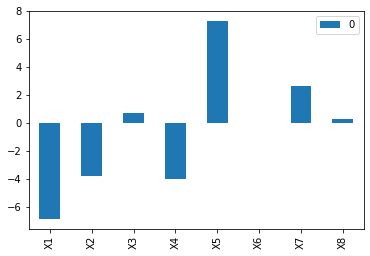

In [27]:
ml1 = lr.fit(x, y1)
coefs = ml1.coef_
dd = pd.DataFrame(coefs, index=cols)
dd.plot.bar()

<AxesSubplot:>

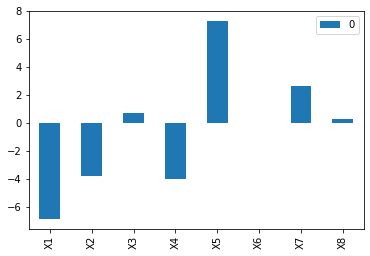

In [28]:
ml2 = lr.fit(x, y2)
coefs1 = ml1.coef_
dd1 = pd.DataFrame(coefs, index=cols)
dd1.plot.bar()

In [29]:
xh = df_ml.loc[:, ['X1', 'X2', 'X4', 'X5', 'X7']]
# ssh = StandardScaler()
# ssh.fit(xh)
# xh_ss = ssh.transform(xh)

        scores
MAE   2.182073
MSE   9.153208
RMSE  3.025427


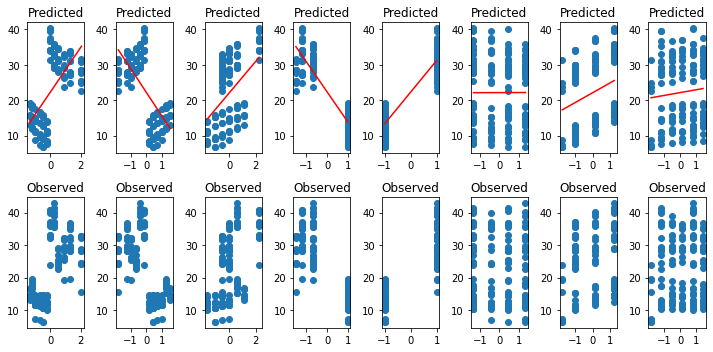

In [30]:
modelling(x, y1, 'all', lr)

        scores
MAE   2.195295
MSE   9.893428
RMSE  3.145382


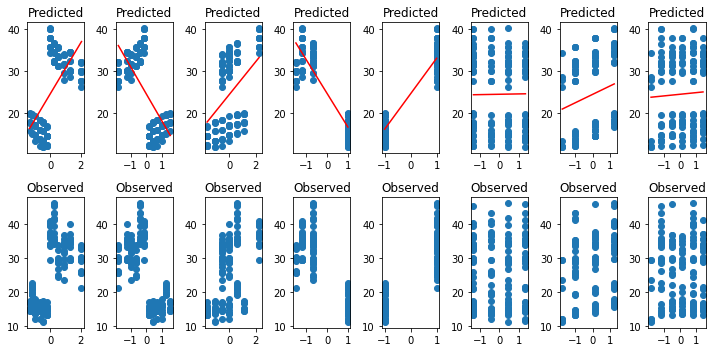

In [31]:
modelling(x, y2, 'all', lr)